# Plotly Visualization 

The aim of this notebook is to proivde guidelines on how to achieve parity with Pandas' visualization methods as explained in http://pandas.pydata.org/pandas-docs/stable/visualization.html with the use of **Plotly** and **Cufflinks**

In [1]:
import pandas as pd
import cufflinks as cf
import numpy as np
from IPython.display import display,HTML

## Theme

Cufflinks can set global theme (sytle) to used. 
In this case we will use Matplotlib's `ggplot` style. 

In [2]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

## Basic Plotting

The `iplot` method on Series and DataFrame is wrapper of Plotly's `plot` method

D:\Anaconda\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



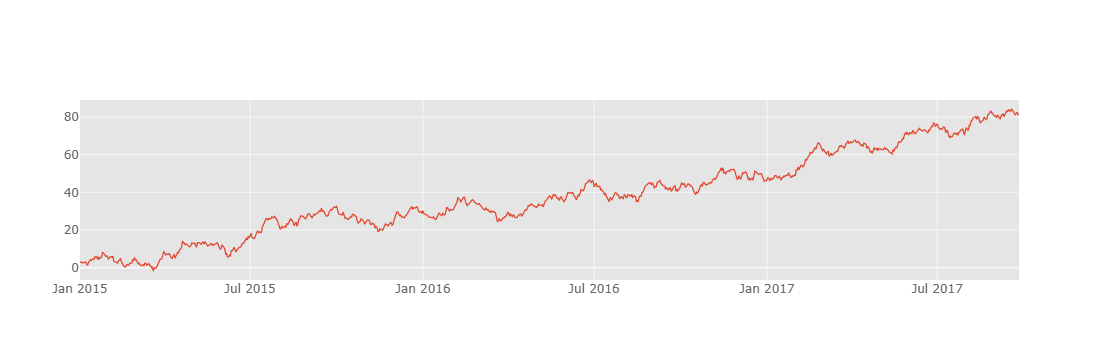

In [5]:
# Cufflinks can generate random data for different shapes
# Let's generate a single line with 1000 points
cf.datagen.lines(1,1000).iplot()

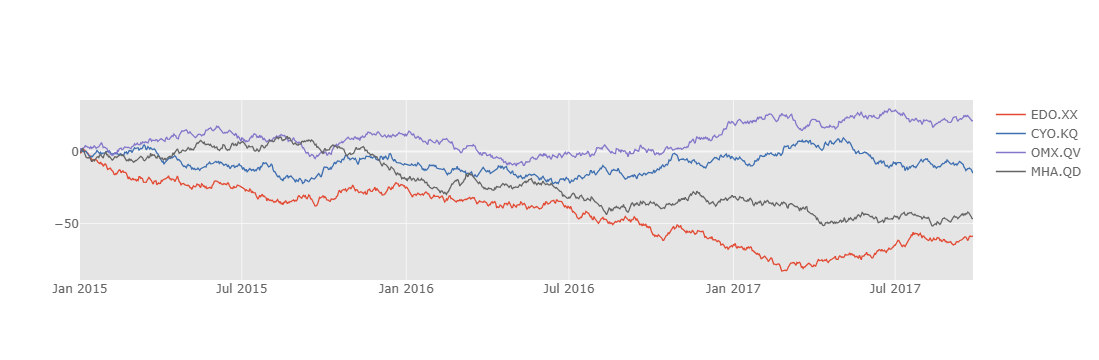

In [7]:
# Generating 4 timeseries 
df=cf.datagen.lines(4,1000)
df.iplot()

You can plot one column versus another using the *x* and *y* keywords in `iplot`

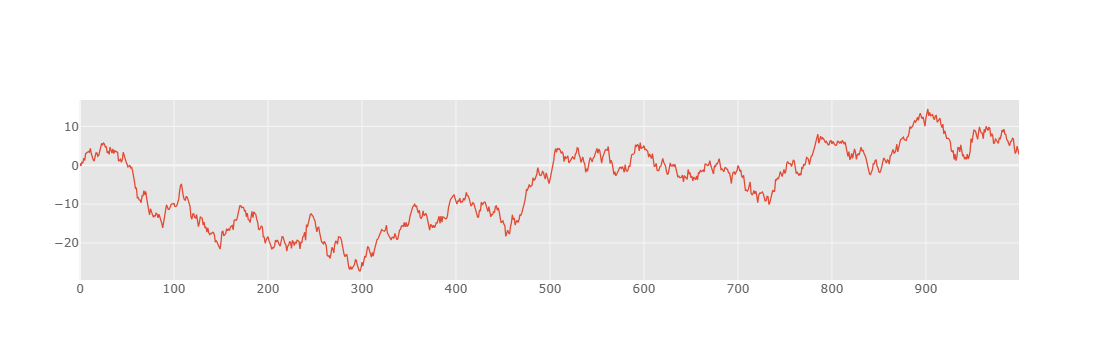

In [9]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df3))))
df3.iplot(x='A', y='B')

## Bar Plots

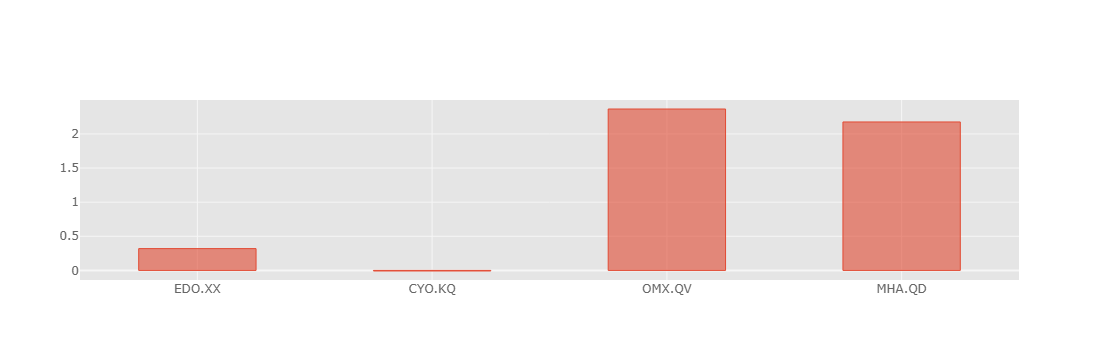

In [11]:
df.iloc[3].iplot(kind='bar',bargap=.5)

Calling a DataFrame’s `plot()` method with `kind='bar'` produces a multiple bar plot:

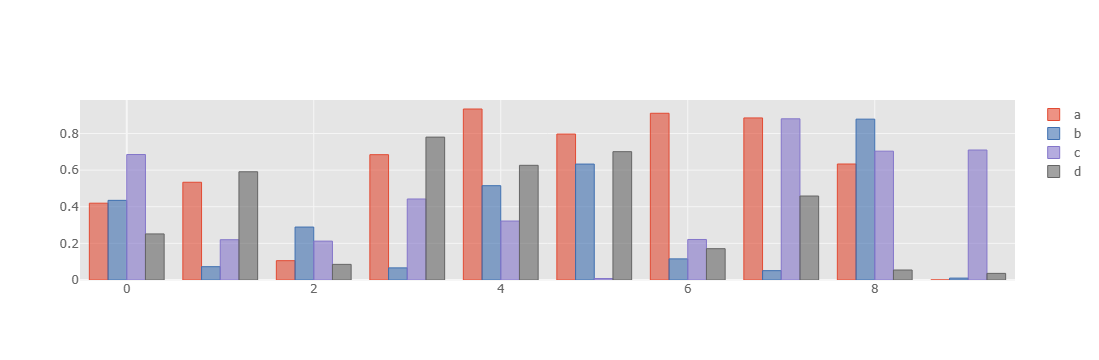

In [13]:
df=pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.iplot(kind='bar')


To produce a stacked bar plot, use `barmode=stack`

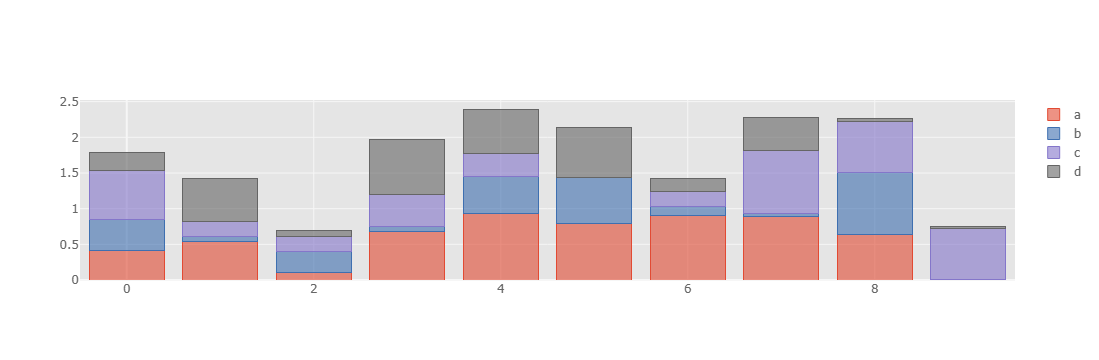

In [15]:
df.iplot(kind='bar',barmode='stack')

To get horizontal bar plots, pass `kind='barh'`

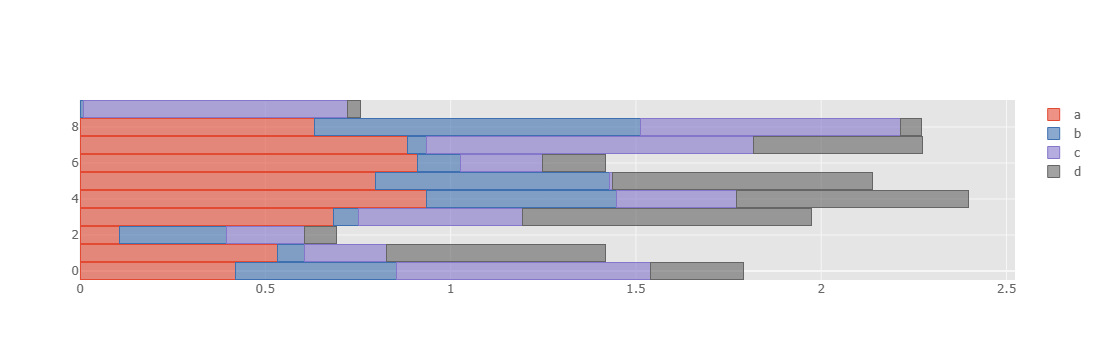

In [17]:
df.iplot(kind='barh',barmode='stack',bargap=.1)

## Histograms

Historgrams can be used with `kind='histogram'`

In [11]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
   

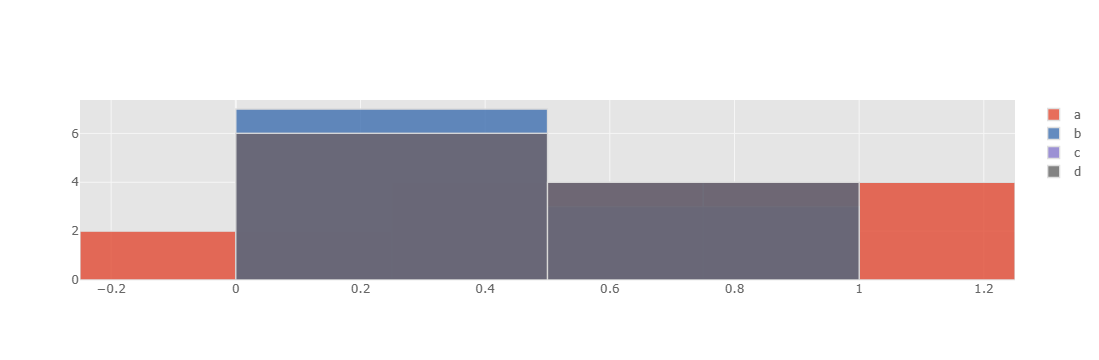

In [19]:
df.iplot(kind='histogram')

Histogram can be stacked by using `barmode=stack`. Bin size can be changed by `bin` keyword. 

In [13]:
df.iplot(kind='histogram',barmode='stack',bins=20)

Orientation can normalization can also be set for Histograms by using `orientation='horizontal'` and `histnorm=probability`.

In [14]:
df.iplot(kind='histogram',columns=['a'],orientation='h',histnorm='probability')

Histograms (and any other kind of plot) can be set in a multiple layout by using `subplots=True`

In [15]:
df_h=cf.datagen.histogram(4)
df_h.iplot(kind='histogram',subplots=True,bins=50)

## Box Plots

Boxplots can be drawn calling a `Series` and `DataFrame` with `kind='box'`

In [16]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.iplot(kind='box')

### Grouping values

In [17]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

Grouping values by generating a list of figures

In [18]:
figs=[df[df['X']==d][['Col1','Col2']].iplot(kind='box',asFigure=True) for d in pd.unique(df['X']) ]

In [19]:
cf.iplot(cf.subplots(figs))

Grouping values and ammending the keys

In [20]:
def by(df,category):
    l=[]
    for cat in pd.unique(df[category]):
        _df=df[df[category]==cat]
        del _df[category]
        _df=_df.rename(columns=dict([(k,'{0}_{1}'.format(cat,k)) for k in _df.columns]))
        l.append(_df.iplot(kind='box',asFigure=True))
    return l
    

In [21]:
cf.iplot(cf.subplots(by(df,'X')))

## Area Plots

You can create area plots with Series.plot and DataFrame.plot by passing `kind='area'`.  To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains NaN, it will be automatically filled by 0. If you want to drop or fill by different values, use dataframe.dropna() or dataframe.fillna() before calling plot.

To fill the area you can use `fill=True`

In [22]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

In [23]:
df.iplot(kind='area',fill=True,opacity=1)

For non-stacked charts you can use `kind=scatter` with `fill=True`. Alpha value is set to 0.3 unless otherwise specified:

In [24]:
df.iplot(fill=True)

## Scatter Plot

You can create scatter plots with DataFrame.plot by passing `kind='scatter'`. Scatter plot requires numeric columns for x and y axis. These can be specified by x and y keywords each, otherwise the DataFrame index will be used as `x`

In [25]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

In [26]:
df.iplot(kind='scatter',x='a',y='b',mode='markers')

Colors can be assigned as either a list or dicitonary by using `color`. 
The marker symbol can be defined by using `symbol`

In [27]:
df.iplot(kind='scatter',mode='markers',symbol='circle-dot',colors=['orange','teal','blue','yellow'],size=10)

Bubble charts can be used with `kind=bubble` and by assigning one column as the `size`

In [28]:
df.iplot(kind='bubble',x='a',y='b',size='c')

## Scatter Matrix

You can create a scatter plot matrix using the function `scatter_matrix` 

In [29]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

In [30]:
df.scatter_matrix()

## Subplots

Subplots can be defined with `subplots=True`. The shape of the output can also be determined with `shape=(rows,cols)`. If omitted then the subplot shape will automatically defined. 

Axes can be shared across plots with `shared_xaxes=True` as well as `shared_yaxes=True`

In [31]:
df=cf.datagen.lines(4)

In [32]:
df.iplot(subplots=True,shape=(4,1),shared_xaxes=True,vertical_spacing=.02,fill=True)

Subplot Title can be set with `subplot_titles`. If set to `True` then the column names will be used. Otherwise a list of strings can be passed. 

In [36]:
df.iplot(subplots=True,subplot_titles=True,legend=False)

/Users/jorgesantos/anaconda/envs/plotly3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.




Irregular Subplots can also be drawn using `specs`.  
For example, for getting a charts that spans across 2 rows we can use `specs=[[{'rowspan':2},{}],[None,{}]]`.  
For a full set of advanced layout you can see `help(cufflinks.subplots)`

In [37]:
df=cf.datagen.bubble(10,50,mode='stocks')

In [38]:
figs=cf.figures(df,[dict(kind='histogram',keys='x',color='blue'),
                    dict(kind='scatter',mode='markers',x='x',y='y',size=5),
                    dict(kind='scatter',mode='markers',x='x',y='y',size=5,color='teal')],asList=True)
figs.append(cf.datagen.lines(1).figure(bestfit=True,colors=['blue'],bestfit_colors=['pink']))
base_layout=cf.tools.get_base_layout(figs)
sp=cf.subplots(figs,shape=(3,2),base_layout=base_layout,vertical_spacing=.15,horizontal_spacing=.03,
               specs=[[{'rowspan':2},{}],[None,{}],[{'colspan':2},None]],
               subplot_titles=['Histogram','Scatter 1','Scatter 2','Bestfit Line'])
sp['layout'].update(showlegend=False)

/Users/jorgesantos/anaconda/envs/plotly3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.

/Users/jorgesantos/anaconda/envs/plotly3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.




In [39]:
cf.iplot(sp)

### Shapes

Lines can be added with `hline` and `vline` for horizontal and vertical lines respectively. 
These can be either a list of values (relative to the axis) or a dictionary. 

In [40]:
df=cf.datagen.lines(3,columns=['a','b','c'])

In [41]:
df.iplot(hline=[2,4],vline=['2015-02-10'])

More advanced parameters can be passed in the form of a dictionary, including `width` and  `color` and `dash` for the line dash type. 

In [42]:
df.iplot(hline=[dict(y=-1,color='blue',width=3),dict(y=1,color='pink',dash='dash')])

Shaded areas can be plotted using `hspan` and `vspan` for horizontal and vertical areas respectively.  
These can be set with a list of paired tuples (v0,v1) or a list of dictionaries with further parameters. 

In [43]:
df.iplot(hspan=[(-1,1),(2,5)])

Extra parameters can be passed in the form of dictionaries, `width`, `fill`, `color`, `fillcolor`, `opacity`

In [44]:
df.iplot(vspan={'x0':'2015-02-15','x1':'2015-03-15','color':'teal','fill':True,'opacity':.4})

In [45]:
# Plotting resistance lines
max_vals=df.max().values.tolist()
resistance=[dict(kind='line',y=i,color=j,width=2) for i,j in zip(max_vals,['red','blue','pink'])]
df.iplot(hline=resistance)

Different shapes can also be used with `shapes` and identifying the `kind` which can be either *line*, *rect* or *circle*

In [46]:
# Get min to max values

df_a=df['a']
max_val=df_a.max()
min_val=df_a.min()
max_date=df_a[df_a==max_val].index[0].strftime('%Y-%m-%d')
min_date=df_a[df_a==min_val].index[0].strftime('%Y-%m-%d')
shape1=dict(kind='line',x0=max_date,y0=max_val,x1=min_date,y1=min_val,color='blue',width=2)
shape2=dict(kind='rect',x0=max_date,x1=min_date,fill=True,color='gray',opacity=.3)

In [47]:
df_a.iplot(shapes=[shape1,shape2])

#### Other Shapes

In [48]:
x0 = np.random.normal(2, 0.45, 300)
y0 = np.random.normal(2, 0.45, 300)

x1 = np.random.normal(6, 0.4, 200)
y1 = np.random.normal(6, 0.4, 200)

x2 = np.random.normal(4, 0.3, 200)
y2 = np.random.normal(4, 0.3, 200)

distributions = [(x0,y0),(x1,y1),(x2,y2)]

In [49]:
dfs=[pd.DataFrame(dict(x=i,y=j)) for i,j in distributions]

In [50]:
d=[]
gen=cf.colorgen(scale='ggplot')

In [51]:
for df in dfs:
    d_=df.figure(kind='scatter',mode='markers',x='x',y='y',size=5,colors=gen)['data']
    for _ in d_:
        d.append(_)

In [52]:
gen=cf.colorgen(scale='ggplot')
shapes=[cf.tools.get_shape(kind='circle',x0=min(x),x1=max(x),
         y0=min(y),y1=max(y),color=next(gen),fill=True,
         opacity=.3,width=.4) for x,y in distributions]

In [53]:
fig=dict(data=d)
fig['layout']=cf.getLayout(shapes=shapes,legend=False,title='Distribution Comparison')
cf.iplot(fig,validate=False)